In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)


0.8333333333333334

In [6]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "hinge", random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)
print(len(x_train), len(x_val))

364 91


In [8]:
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)
#데이터 양이 너무 적은 상태에서 검증세트를 떼어냈기 때문에 평가 점수가 낮아짐

0.6923076923076923

['mean perimeter' 'mean area']


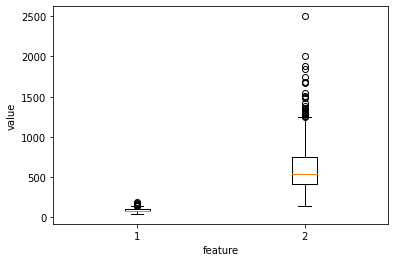

In [9]:
import matplotlib.pyplot as plt
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel("feature")
plt.ylabel("value")
plt.show()
 

In [10]:
import numpy as np

In [11]:
class SingleLayer:

  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b #여러 특성을 np.sum을 통해 간단하게 표현
    return z

  def backprob(self, x ,err):
    w_grad = x * err
    b_grad = err
    return w_grad, b_grad

  def fit(self,x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprob(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a) + (1-y[i]*np.log(1-a)))
      self.losses.append(loss/len(y))

  def activation(self, z):
    z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
    a = 1/ (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [12]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

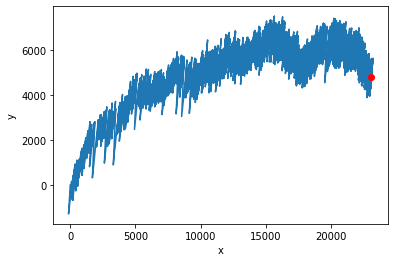

In [13]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

